In [1]:
import pandas as pd
import numpy as np
from numpy import array
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
)

from pylab import rcParams
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("data_padi_sumatera_v1.csv")
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


### Understanding Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [4]:
df.shape

(224, 7)

In [5]:
df.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [6]:
df.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [7]:
for column in df.columns:
    print(f"--- {column} ---")
    display(df[column].value_counts())
    print()

--- Provinsi ---


Provinsi
Aceh                28
Sumatera Utara      28
Sumatera Barat      28
Riau                28
Jambi               28
Sumatera Selatan    28
Bengkulu            28
Lampung             28
Name: count, dtype: int64


--- Tahun ---


Tahun
1993    8
1994    8
1995    8
1996    8
1997    8
1998    8
1999    8
2000    8
2001    8
2002    8
2003    8
2004    8
2005    8
2006    8
2007    8
2008    8
2009    8
2010    8
2011    8
2012    8
2013    8
2014    8
2015    8
2016    8
2017    8
2018    8
2019    8
2020    8
Name: count, dtype: int64


--- Produksi ---


Produksi
1329536.00    1
1299699.00    1
1382905.00    1
1419128.00    1
1368074.00    1
             ..
3831923.00    1
4090654.00    1
2488641.91    1
2164089.33    1
2604913.29    1
Name: count, Length: 224, dtype: int64


--- Luas Panen ---


Luas Panen
323589.00    1
329041.00    1
339253.00    1
348223.00    1
337561.00    1
            ..
390799.00    1
396559.00    1
511940.93    1
464103.42    1
545149.05    1
Name: count, Length: 224, dtype: int64


--- Curah hujan ---


Curah hujan
3396.0    2
2364.7    2
2584.9    2
3390.0    2
1339.0    1
         ..
2317.6    1
1825.1    1
1385.8    1
1706.4    1
2211.3    1
Name: count, Length: 220, dtype: int64


--- Kelembapan ---


Kelembapan
84.00    5
82.00    4
79.00    4
81.40    3
83.80    3
        ..
78.90    1
77.04    1
76.05    1
78.03    1
75.80    1
Name: count, Length: 180, dtype: int64


--- Suhu rata-rata ---


Suhu rata-rata
27.10    12
27.00    10
26.80     7
26.90     7
26.70     6
         ..
26.59     1
26.18     1
26.36     1
27.23     1
24.58     1
Name: count, Length: 136, dtype: int64

### Drop Duplikasi Data

In [8]:
df.shape

(224, 7)

In [9]:
df = df.drop_duplicates(keep="first")

In [10]:
df.shape

(224, 7)

### Missing Values

In [11]:
df.isna().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

### Handling Missing Value

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


### EDA

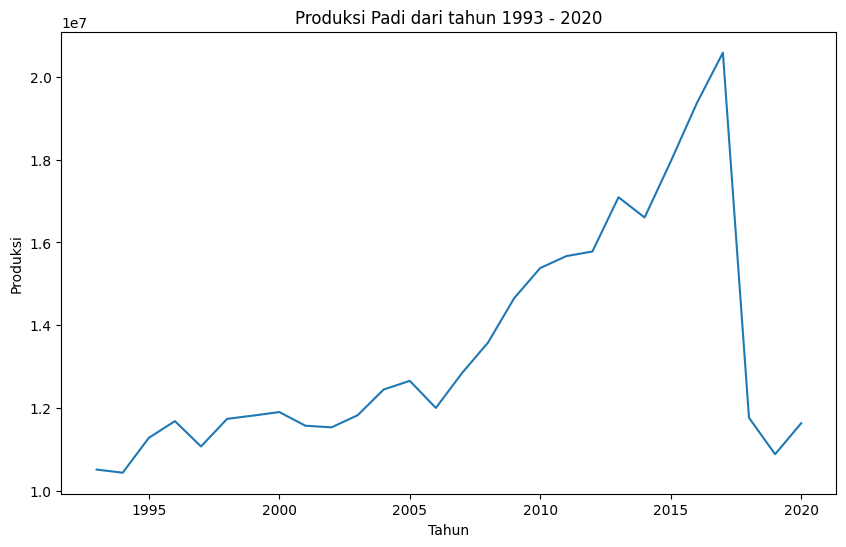

In [13]:
plt.figure(figsize=(10, 6))
df.groupby("Tahun")["Produksi"].sum().plot()
plt.xlabel("Tahun")
plt.ylabel("Produksi")
plt.title("Produksi Padi dari tahun 1993 - 2020")
plt.show()

Produksi Berdasarkan Tahun: 
 Tahun
1993    10511106.00
1994    10434879.00
1995    11277878.00
1996    11681931.00
1997    11069582.00
1998    11736390.00
1999    11816051.00
2000    11901379.00
2001    11571056.00
2002    11531731.00
2003    11823024.00
2004    12445839.00
2005    12655694.00
2006    12001280.00
2007    12841479.00
2008    13581940.00
2009    14652674.00
2010    15382976.00
2011    15670413.00
2012    15782225.00
2013    17093915.00
2014    16604009.00
2015    17956252.00
2016    19365875.90
2017    20586773.50
2018    11764423.68
2019    10881099.49
2020    11631123.08
Name: Produksi, dtype: float64


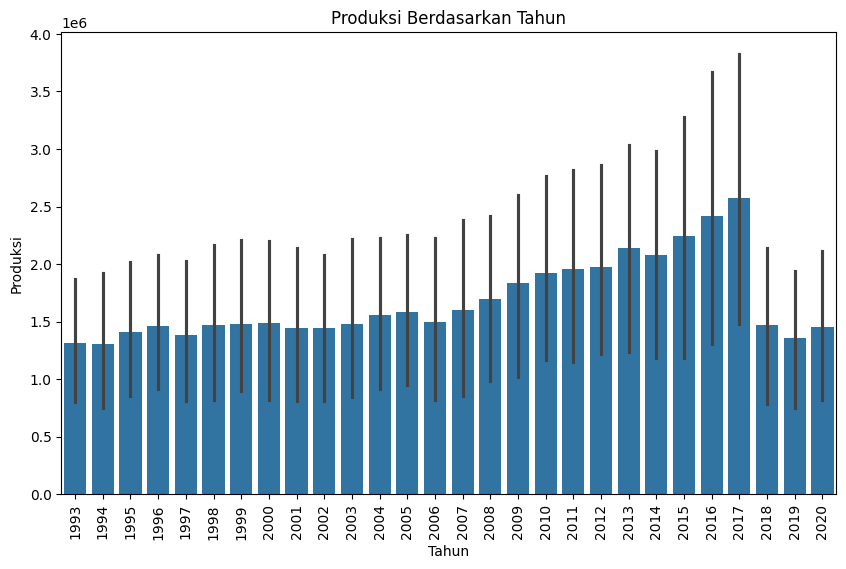

In [14]:
# Trend

plt.figure(figsize=(10, 6))
sns.barplot(x=df["Tahun"], y=df["Produksi"])
plt.xlabel("Tahun")
plt.xticks(rotation=90)
plt.ylabel("Produksi")
plt.title("Produksi Berdasarkan Tahun")
plt.show
print("Produksi Berdasarkan Tahun: \n", df.groupby("Tahun")["Produksi"].sum())

Produksi Berdasarkan Provinsi: 
 Provinsi
Aceh                45324629.64
Bengkulu            12459015.75
Jambi               15480186.69
Lampung             68433897.53
Riau                11409006.55
Sumatera Barat      55731075.23
Sumatera Selatan    74161992.54
Sumatera Utara      93253194.72
Name: Produksi, dtype: float64


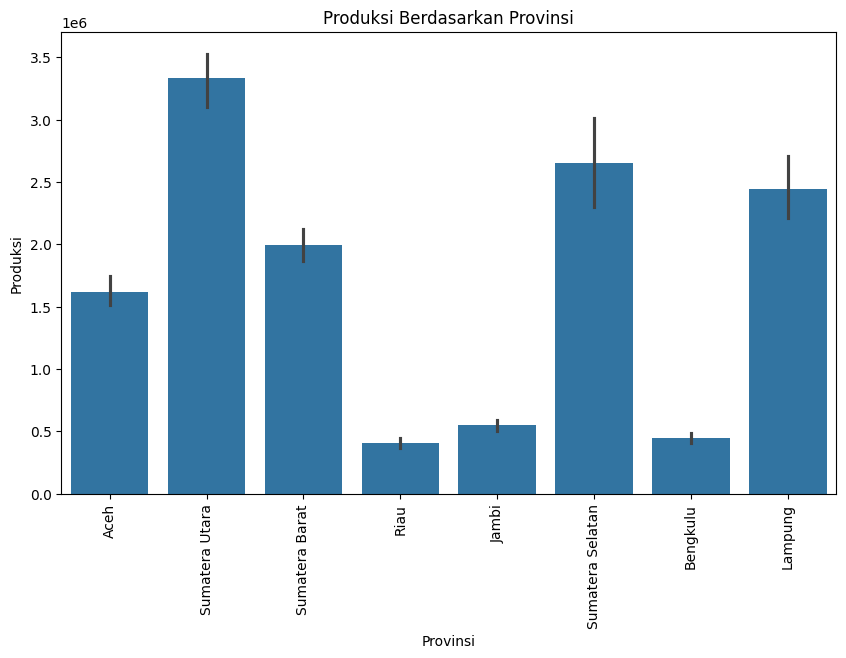

In [15]:
# Trend

plt.figure(figsize=(10, 6))
sns.barplot(x=df["Provinsi"], y=df["Produksi"])
plt.xlabel("Provinsi")
plt.xticks(rotation=90)
plt.ylabel("Produksi")
plt.title("Produksi Berdasarkan Provinsi")
plt.show
print("Produksi Berdasarkan Provinsi: \n", df.groupby("Provinsi")["Produksi"].sum())

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

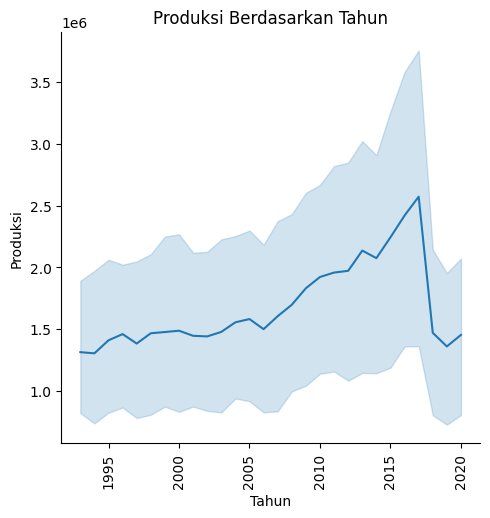

In [16]:
# Trend

plt.figure(figsize=(10, 6))
sns.relplot(x=df["Tahun"], y=df["Produksi"], kind="line")
plt.xlabel("Tahun")
plt.xticks(rotation=90)
plt.ylabel("Produksi")
plt.title("Produksi Berdasarkan Tahun")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

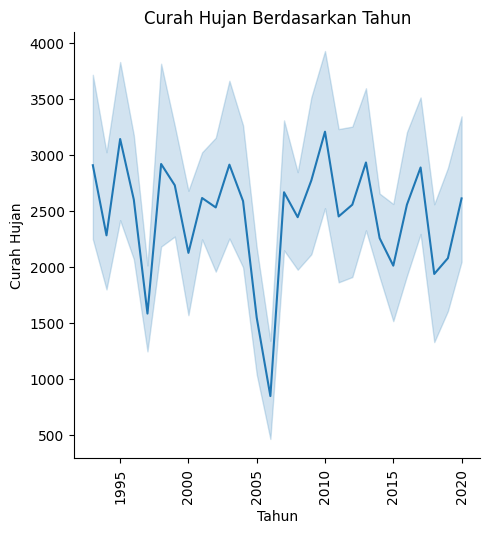

In [17]:
# Trend

plt.figure(figsize=(10, 6))
sns.relplot(x=df["Tahun"], y=df["Curah hujan"], kind="line")
plt.xlabel("Tahun")
plt.xticks(rotation=90)
plt.ylabel("Curah Hujan")
plt.title("Curah Hujan Berdasarkan Tahun")
plt.show

In [18]:
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


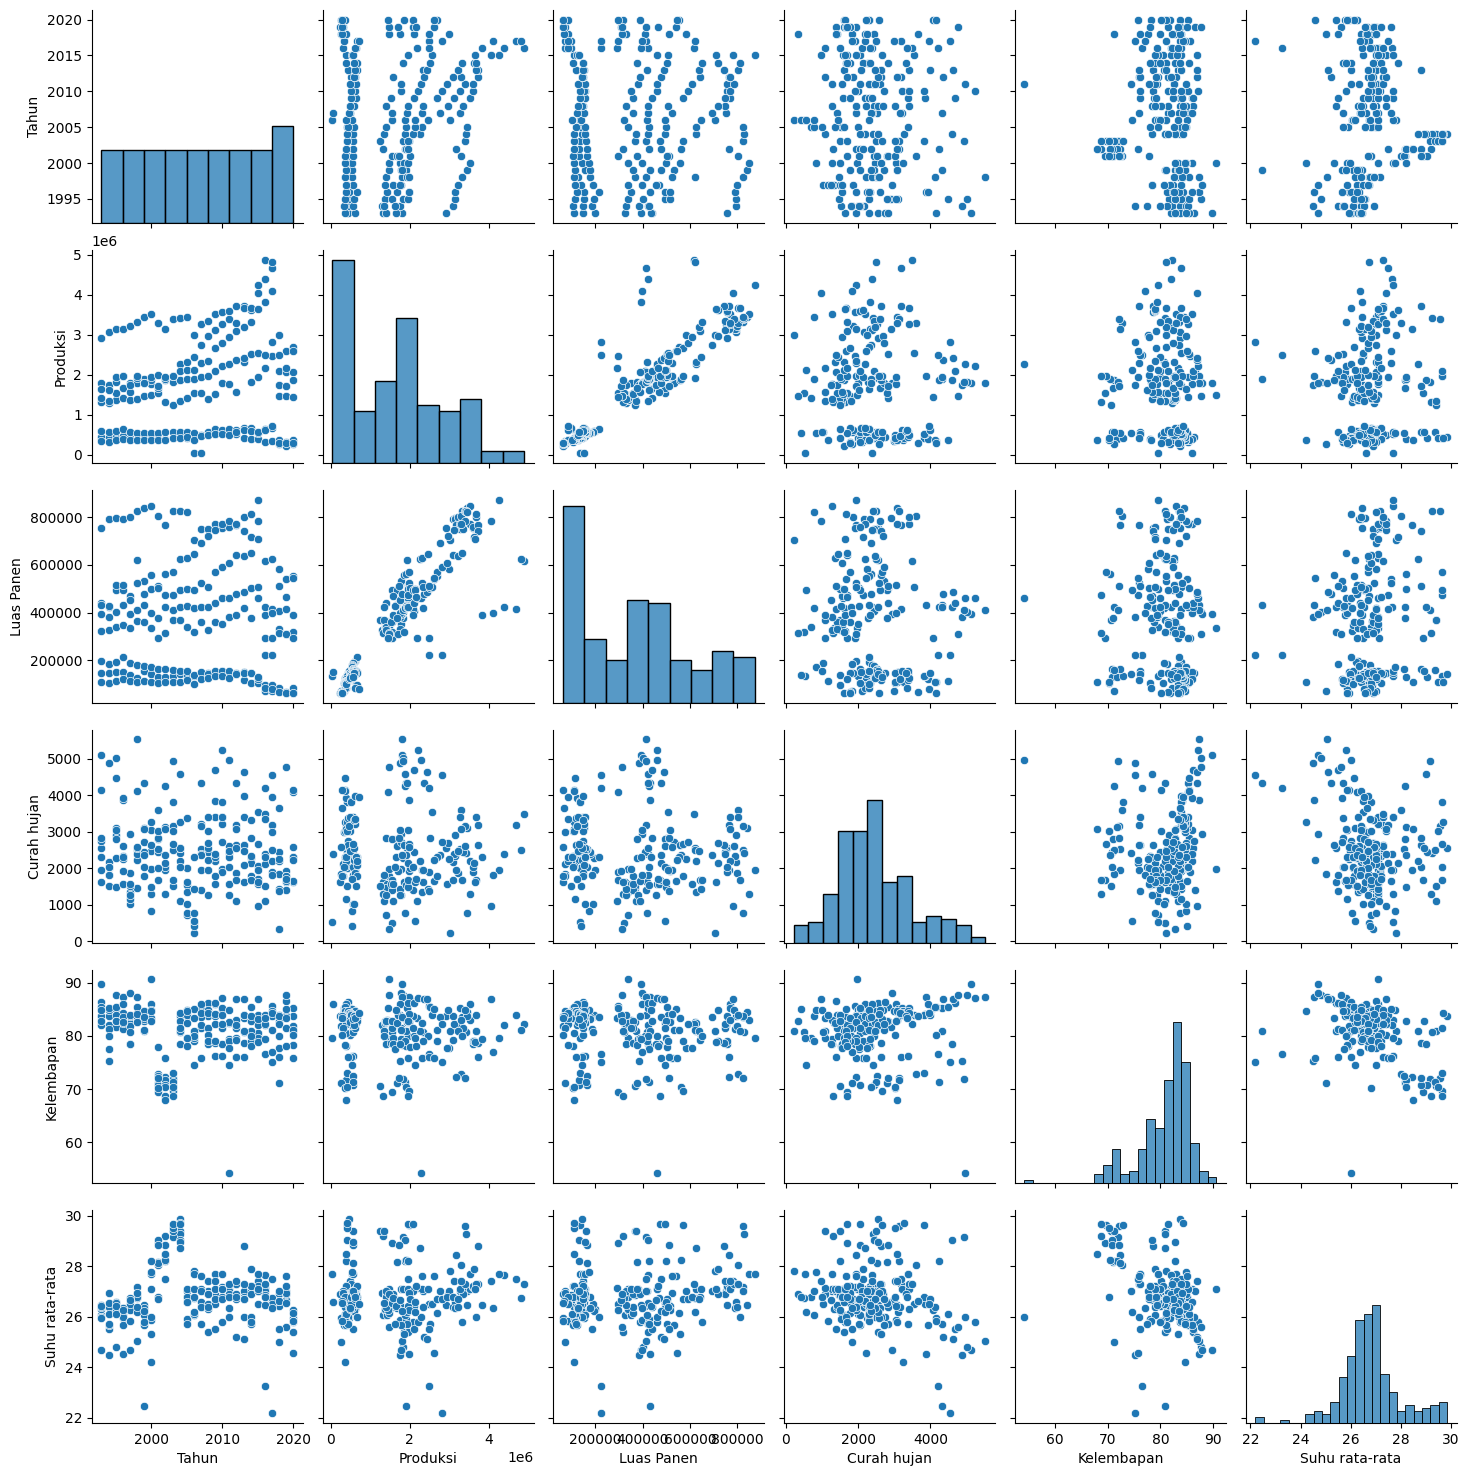

In [19]:
sns.pairplot(df)

<Axes: >

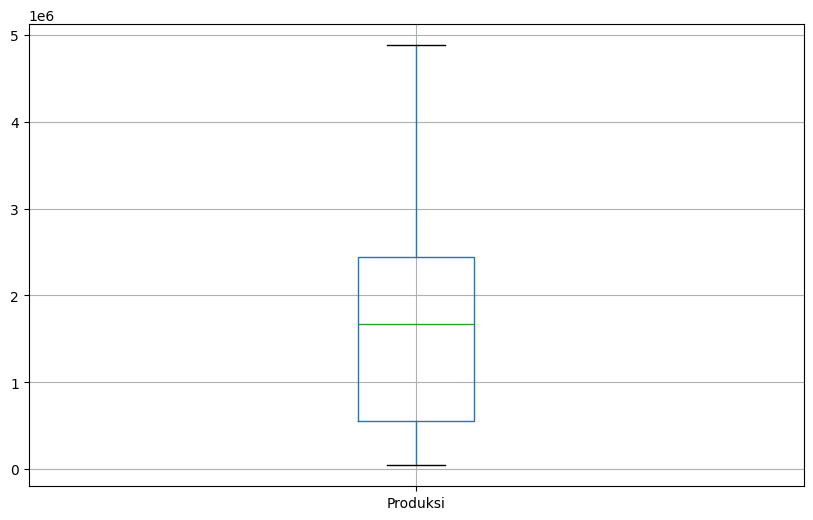

In [20]:
# Cek Outlier

df[["Produksi"]].boxplot(figsize=(10, 6))

In [21]:
# Korelasi matrix antara variabel numerikal

df.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [22]:
# Ubah column order

cols = list(df.columns)
df = df.copy()
df = df[cols[1:2] + cols[3:7] + [cols[2]]]
df.tail()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,2020,545149.05,2211.3,75.80,24.58,2604913.29


In [23]:
df.corr()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Tahun,1.000000,-0.045951,-0.047645,-0.033474,0.004923,0.182527
Luas Panen,-0.045951,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.047645,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.033474,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.004923,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.182527,0.905622,-0.042129,-0.052316,0.041160,1.000000


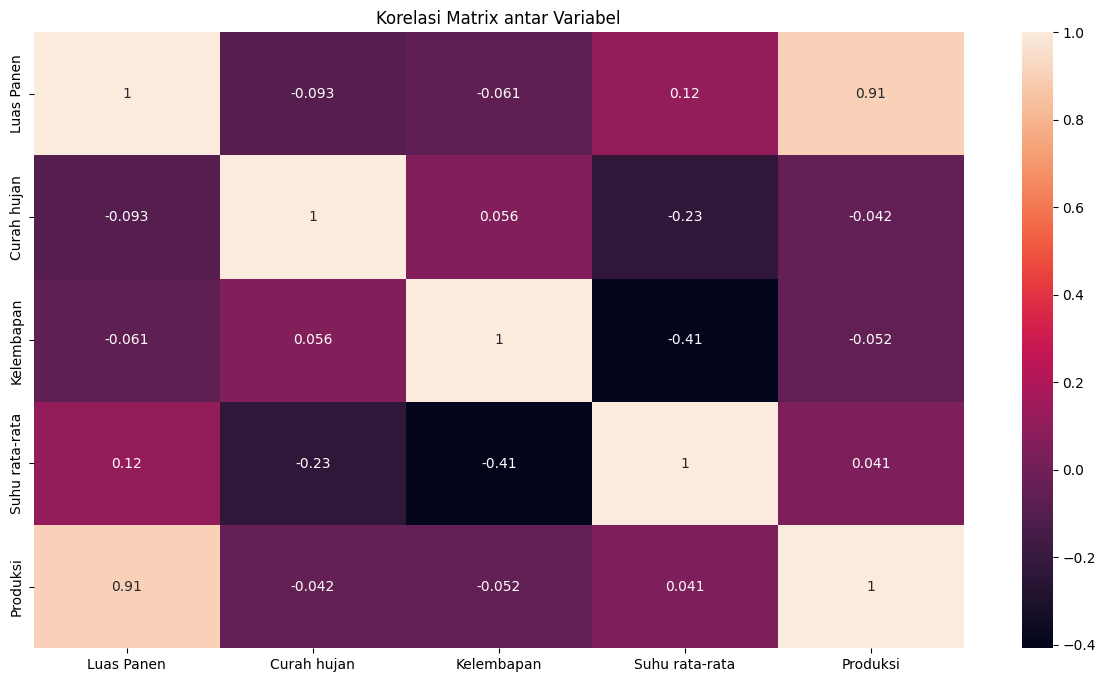

In [24]:
fig, ax = plt.subplots(figsize=(15, 8), dpi=100)
sns.heatmap(df.loc[:, "Luas Panen":"Produksi"].corr(), annot=True)
plt.title("Korelasi Matrix antar Variabel")
plt.show()

### Feature Engineering

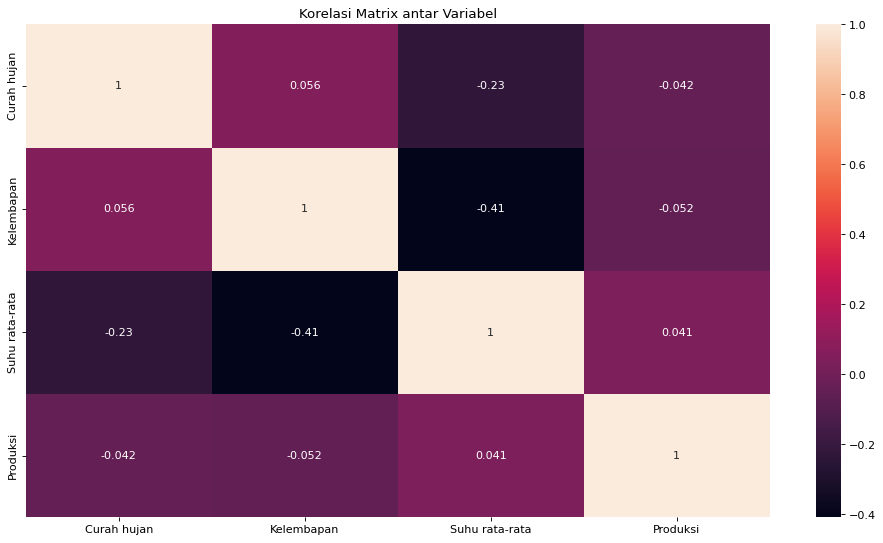

In [25]:
fig, ax = plt.subplots(figsize=(15, 8), dpi=80)
sns.heatmap(df.loc[:, "Curah hujan":"Produksi"].corr(), annot=True)
plt.title("Korelasi Matrix antar Variabel")
plt.show()

In [26]:
# split data -> prevent data leakage

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
df.isna().sum()

Tahun             0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
Produksi          0
dtype: int64

#### Handling Missing Value di Data Train

In [28]:
100 * len(train[train["Produksi"].isna()] / len(train))

0

In [29]:
100 * len(train[train["Luas Panen"].isna()] / len(train))

0

In [30]:
100 * len(train[train["Curah hujan"].isna()] / len(train))

0

In [31]:
100 * len(train[train["Kelembapan"].isna()] / len(train))

0

In [32]:
100 * len(train[train["Suhu rata-rata"].isna()] / len(train))

0

* karena pada data train tidak ada data yg tidak miss, maka tidak ada test data untuk handling missing value

<Axes: xlabel='Suhu rata-rata', ylabel='Count'>

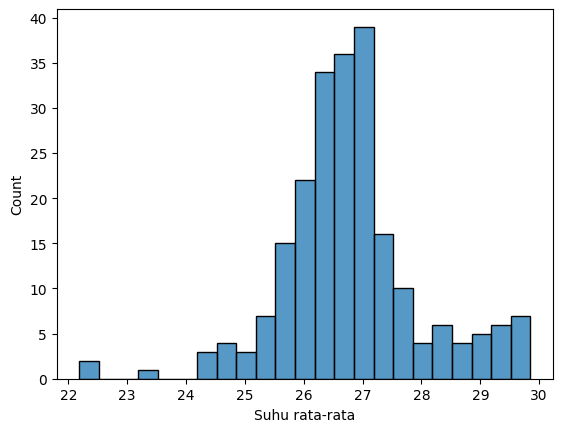

In [33]:
sns.histplot(df["Suhu rata-rata"])

<Axes: xlabel='Produksi', ylabel='Count'>

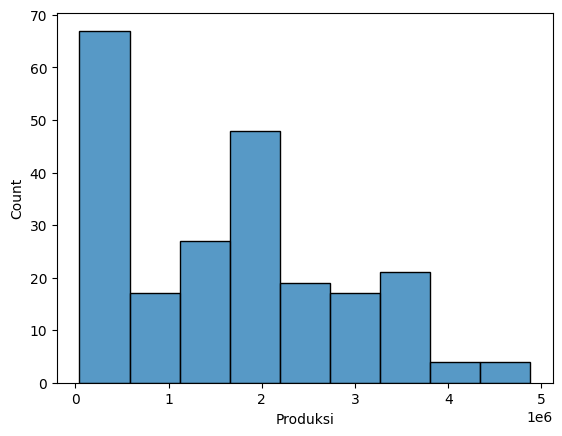

In [34]:
sns.histplot(df["Produksi"])

<Axes: xlabel='Luas Panen', ylabel='Count'>

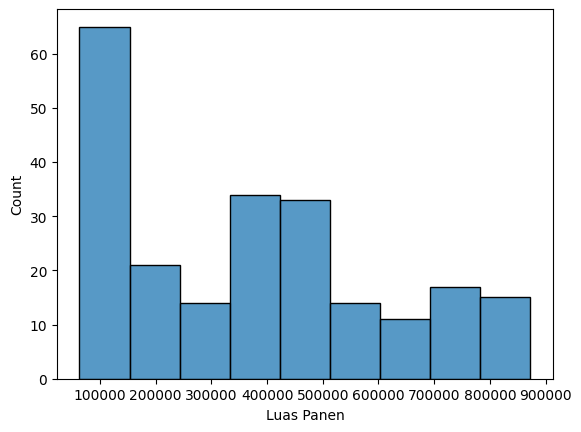

In [35]:
sns.histplot(df["Luas Panen"])

<Axes: xlabel='Kelembapan', ylabel='Count'>

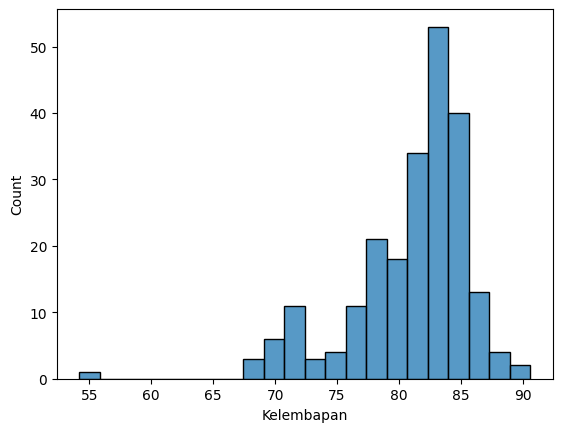

In [36]:
sns.histplot(df["Kelembapan"])

<Axes: ylabel='Count'>

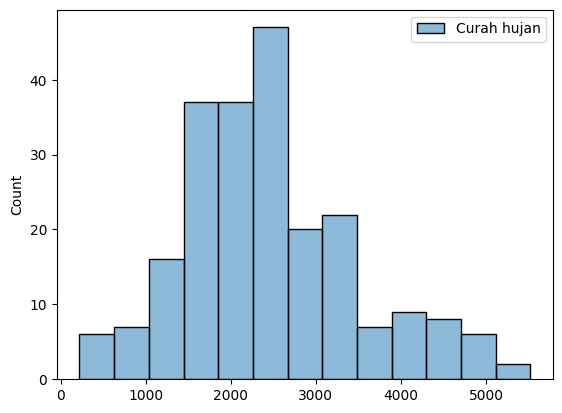

In [37]:
sns.histplot([df["Curah hujan"]])

<Axes: ylabel='Produksi'>

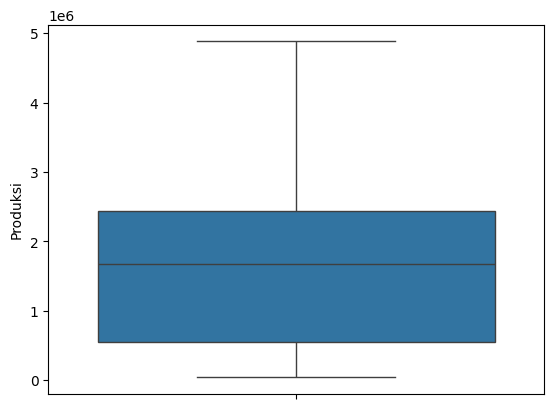

In [38]:
# cek outlier menggunakan boxplot

sns.boxplot(df["Produksi"])

### Feature Selection

In [39]:
df = df.drop(columns='Tahun')
df

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
0,323589.00,1627.0,82.00,26.06,1329536.00
1,329041.00,1521.0,82.12,26.92,1299699.00
2,339253.00,1476.0,82.72,26.27,1382905.00
3,348223.00,1557.0,83.00,26.08,1419128.00
4,337561.00,1339.0,82.46,26.31,1368074.00
...,...,...,...,...,...
219,390799.00,2317.6,79.40,26.45,3831923.00
220,396559.00,1825.1,77.04,26.36,4090654.00
221,511940.93,1385.8,76.05,25.50,2488641.91
222,464103.42,1706.4,78.03,27.23,2164089.33


### Scaler

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Produksi"]])
df["Produksi"] = scaler.transform(df[["Produksi"]])

In [41]:
df

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
0,323589.00,1627.0,82.00,26.06,-0.302181
1,329041.00,1521.0,82.12,26.92,-0.327929
2,339253.00,1476.0,82.72,26.27,-0.256125
3,348223.00,1557.0,83.00,26.08,-0.224866
4,337561.00,1339.0,82.46,26.31,-0.268924
...,...,...,...,...,...
219,390799.00,2317.6,79.40,26.45,1.857298
220,396559.00,1825.1,77.04,26.36,2.080574
221,511940.93,1385.8,76.05,25.50,0.698090
222,464103.42,1706.4,78.03,27.23,0.418012


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Curah hujan"]])
df["Curah hujan"] = scaler.transform(df[["Curah hujan"]])

In [43]:
df

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
0,323589.00,-0.801707,82.00,26.06,-0.302181
1,329041.00,-0.904653,82.12,26.92,-0.327929
2,339253.00,-0.948356,82.72,26.27,-0.256125
3,348223.00,-0.869690,83.00,26.08,-0.224866
4,337561.00,-1.081409,82.46,26.31,-0.268924
...,...,...,...,...,...
219,390799.00,-0.131004,79.40,26.45,1.857298
220,396559.00,-0.609315,77.04,26.36,2.080574
221,511940.93,-1.035957,76.05,25.50,0.698090
222,464103.42,-0.724595,78.03,27.23,0.418012


<Axes: xlabel='Produksi', ylabel='Count'>

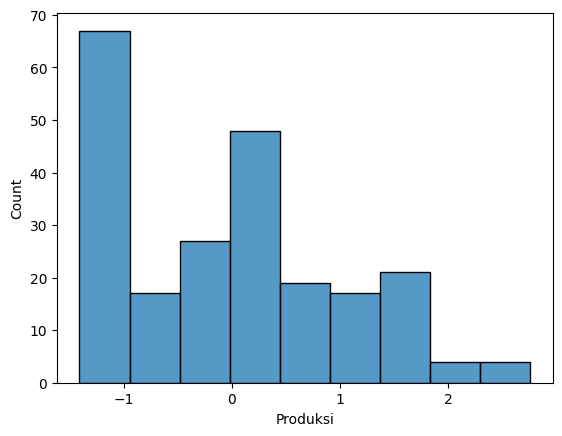

In [44]:
sns.histplot(df["Produksi"])

<Axes: ylabel='Produksi'>

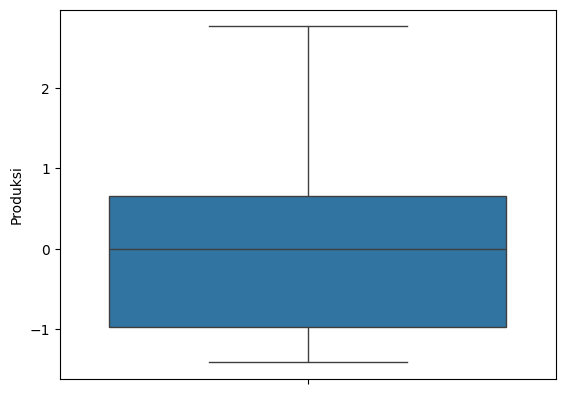

In [45]:
sns.boxplot(df["Produksi"])

### Encoding Categorical Data

In [46]:
for column in df.columns:
    print(f"--- {column} ---")
    display(df[column].value_counts())
    print()

--- Luas Panen ---


Luas Panen
323589.00    1
329041.00    1
339253.00    1
348223.00    1
337561.00    1
            ..
390799.00    1
396559.00    1
511940.93    1
464103.42    1
545149.05    1
Name: count, Length: 224, dtype: int64


--- Curah hujan ---


Curah hujan
 0.916325    2
-0.085261    2
 0.128594    2
 0.910498    2
-1.081409    1
            ..
-0.131004    1
-0.609315    1
-1.035957    1
-0.724595    1
-0.234242    1
Name: count, Length: 220, dtype: int64


--- Kelembapan ---


Kelembapan
84.00    5
82.00    4
79.00    4
81.40    3
83.80    3
        ..
78.90    1
77.04    1
76.05    1
78.03    1
75.80    1
Name: count, Length: 180, dtype: int64


--- Suhu rata-rata ---


Suhu rata-rata
27.10    12
27.00    10
26.80     7
26.90     7
26.70     6
         ..
26.59     1
26.18     1
26.36     1
27.23     1
24.58     1
Name: count, Length: 136, dtype: int64


--- Produksi ---


Produksi
-0.302181    1
-0.327929    1
-0.256125    1
-0.224866    1
-0.268924    1
            ..
 1.857298    1
 2.080574    1
 0.698090    1
 0.418012    1
 0.798428    1
Name: count, Length: 224, dtype: int64

## Simple Linear Regression

In [47]:
x = df.drop('Produksi',axis=1)
y = df[["Produksi"]]

### Data Splitting

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (179, 4)
y_train dataset:  (179, 1)
X_test dataset:  (45, 4)
y_test dataset:  (45, 1)


In [49]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
# Kalkulasi Koefisien

print(lr.intercept_)
print(lr.coef_)

[0.12610726]
[[ 3.95071179e-06  2.11869953e-02 -3.17329123e-03 -4.95850746e-02]]


In [51]:
y_pred = lr.predict(x_test)

In [52]:
type(y_pred)

numpy.ndarray

### RMSE

In [53]:
y_test.shape

(45, 1)

Text(0, 0.5, 'Produksi')

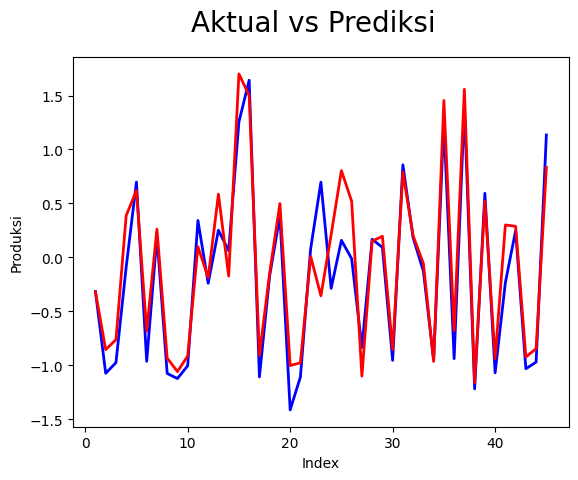

In [54]:
# Aktual vs Prediksi

c = [i for i in range (1,46,1)]
fig = plt.figure()
plt.plot(c,y_test,color='b',linewidth=2,linestyle='-')
plt.plot(c,y_pred,color='r',linewidth=2,linestyle='-')
fig.suptitle('Aktual vs Prediksi',fontsize=20)
plt.xlabel('Index')
plt.ylabel('Produksi')

Text(0, 0.5, 'y-test : y-pred')

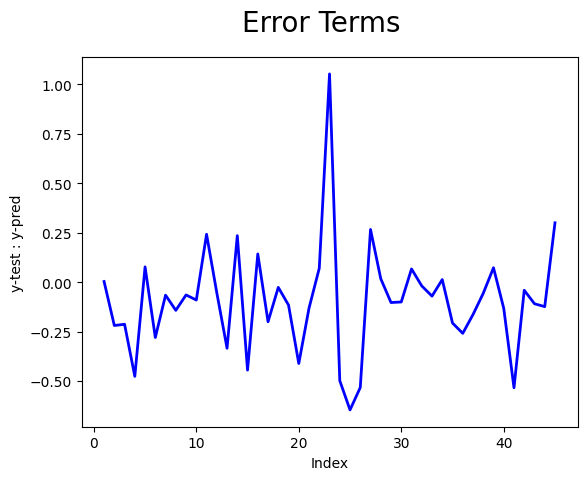

In [55]:
# Error

c = [i for i in range (1,46,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred,color='b',linewidth=2,linestyle='-')
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Index')
plt.ylabel('y-test : y-pred')

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)

In [57]:
r_squared = r2_score(y_test,y_pred)

In [58]:
print('Mean Squared Error: ',mse)
print('r Square Value: ',r_squared)

Mean Squared Error:  0.0857013800596901
r Square Value:  0.8698382149351707


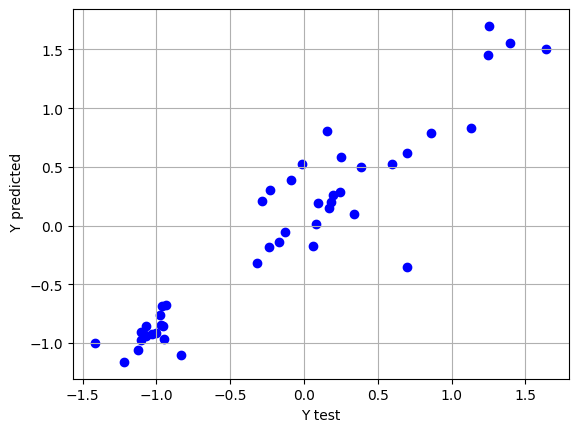

In [59]:
plt.scatter(y_test,y_pred,c='b')
plt.xlabel('Y test')
plt.ylabel(' Y predicted')
plt.grid()

dt = Decision

https://www.kaggle.com/code/yuliadewipuspitasari/rice-production-prediction-on-sumatera-island#Decision-Tree-Regression